In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
train = pd.read_csv("/kaggle/input/used-car-listings-features-and-prices-carscom/train.csv")

In [3]:
train.head()

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595


In [4]:
train.columns = [col.lower() for col in train.columns]

## information about the data

In [5]:
print(f"There are {len(train)} number of rows in the data")

There are 19109 number of rows in the data


In [6]:
info_df = pd.DataFrame(train.isnull().sum(), columns=['#missing'])
info_df['%missing'] = (info_df['#missing'] / len(train)) * 100
info_df['#unique'] = train.nunique()
info_df['dtype'] = train.dtypes

In [7]:
info_df

,#missing,%missing,#unique,dtype
brand,2,0.010466,25,object
model,2,0.010466,3498,object
year,2,0.010466,59,float64
mileage,2,0.010466,17412,float64
engine,47,0.245957,1163,object
engine_size,1249,6.536187,62,float64
transmission,105,0.549479,189,object
automatic_transmission,2,0.010466,2,float64
fuel_type,2,0.010466,10,object
drivetrain,2,0.010466,5,object


Let's drop the rows which is the target value missing

In [8]:
train.dropna(subset=["price"], inplace=True)

Let's filter out the non-numerical values from **price** columns

In [9]:

train = train[train['price'].apply(lambda x: x.isnumeric())]

Change the price to integer

In [10]:
train['price'] = train['price'].astype(int)

## categorical, numerical and target 

- We can see there are a lot of binary variables which has 2 unique numbers

In [11]:
target_var = 'price'
binary_vars = [col for col in train.columns if train[col].nunique() == 2]

cat_vars = [ col for col in train.columns if col not in binary_vars and train[col].dtype == "object"]

num_vars = [ col for col in train.columns if col not in binary_vars and train[col].dtype in ['int64', 'float64'] and col != target_var]

In [12]:
binary_vars

['automatic_transmission',
 'damaged',
 'first_owner',
 'personal_using',
 'turbo',
 'alloy_wheels',
 'adaptive_cruise_control',
 'navigation_system',
 'power_liftgate',
 'backup_camera',
 'keyless_start',
 'remote_start',
 'sunroof/moonroof',
 'automatic_emergency_braking',
 'stability_control',
 'leather_seats',
 'memory_seat',
 'third_row_seating',
 'apple_car_play/android_auto',
 'bluetooth',
 'usb_port',
 'heated_seats']

In [13]:
target_var

'price'

In [14]:
cat_vars

['brand',
 'model',
 'engine',
 'transmission',
 'fuel_type',
 'drivetrain',
 'interior_color',
 'exterior_color']

In [15]:
num_vars

['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg']

## EDA

### Target Variable

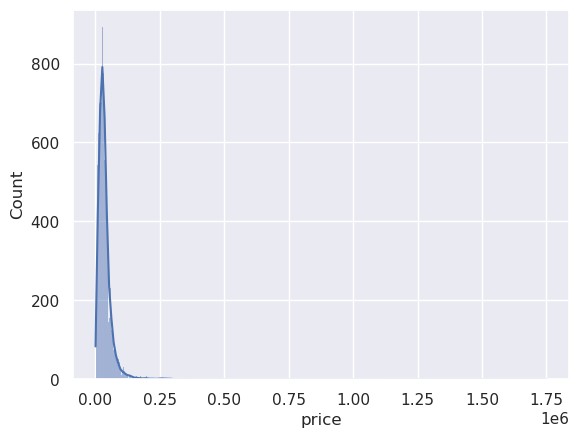

In [16]:
sns.histplot(train[target_var], kde=True)
plt.show()

The **price** is extremely right-skewed so let's filter out some **outlier** values

In [17]:
train['price'].quantile(0.99)

145572.1799999993

Let's approximate the outlier value as **150k**

In [18]:
outlier_price = 150000
train = train[train['price'] < outlier_price]

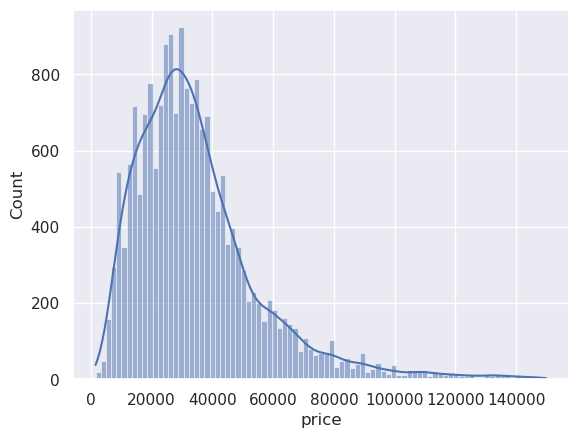

In [19]:
sns.histplot(train[target_var], kde=True)
plt.show()

Still **right-skwed** but it's now better shape now

Let's check the outlier exist in **numerical variables**

In [20]:
train[num_vars]

,year,mileage,engine_size,min_mpg,max_mpg
0,2022.0,6580.0,2.5,NaN,NaN
1,2018.0,62717.0,2.9,NaN,NaN
2,2022.0,15463.0,5.3,NaN,NaN
3,2022.0,1281.0,3.0,NaN,NaN
4,2021.0,36727.0,2.0,NaN,NaN
...,...,...,...,...,...
19104,2017.0,77886.0,3.5,16.0,25.0
19105,2020.0,30921.0,6.2,16.0,24.0
19106,2021.0,25490.0,3.8,NaN,NaN
19107,2019.0,30840.0,1.5,29.0,35.0


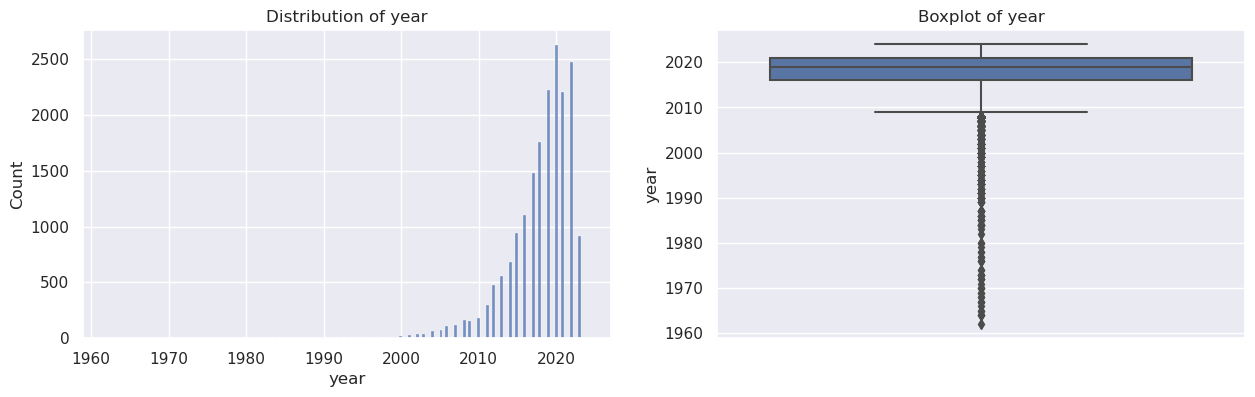

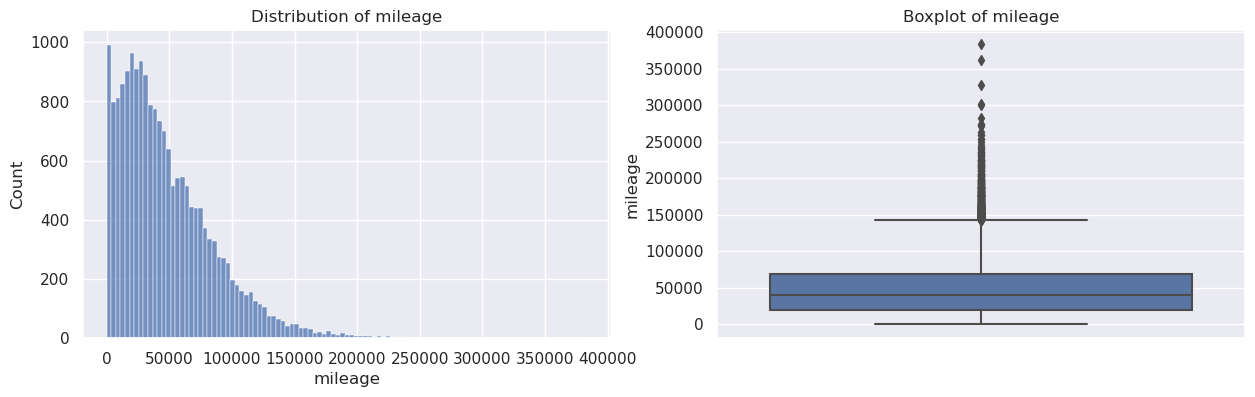

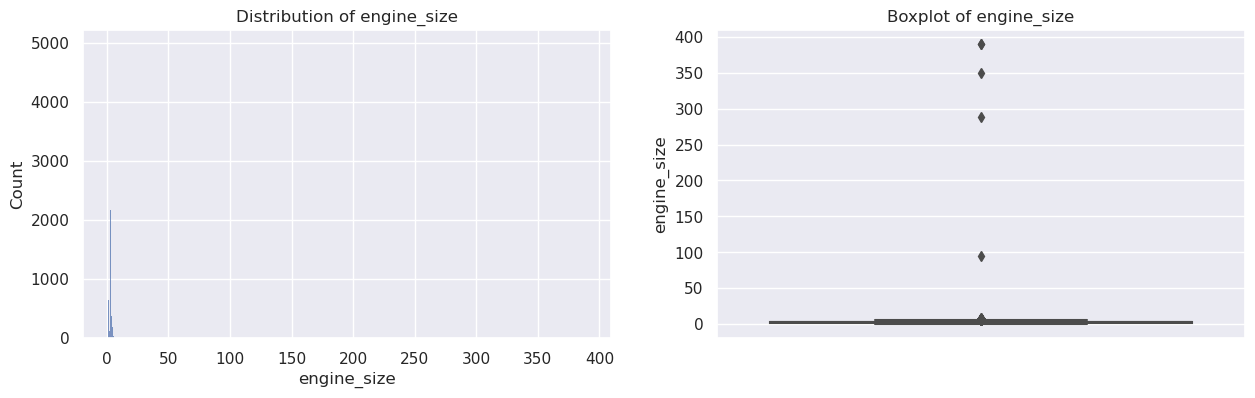

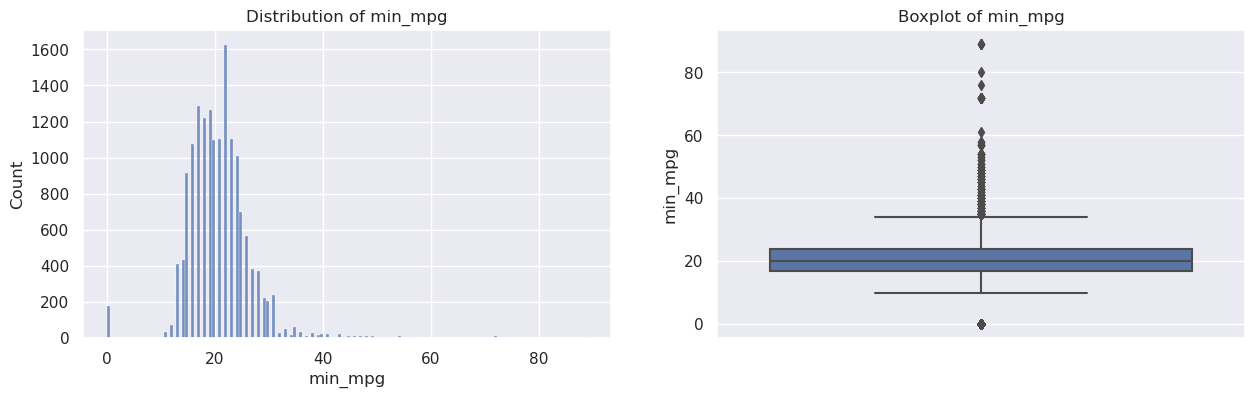

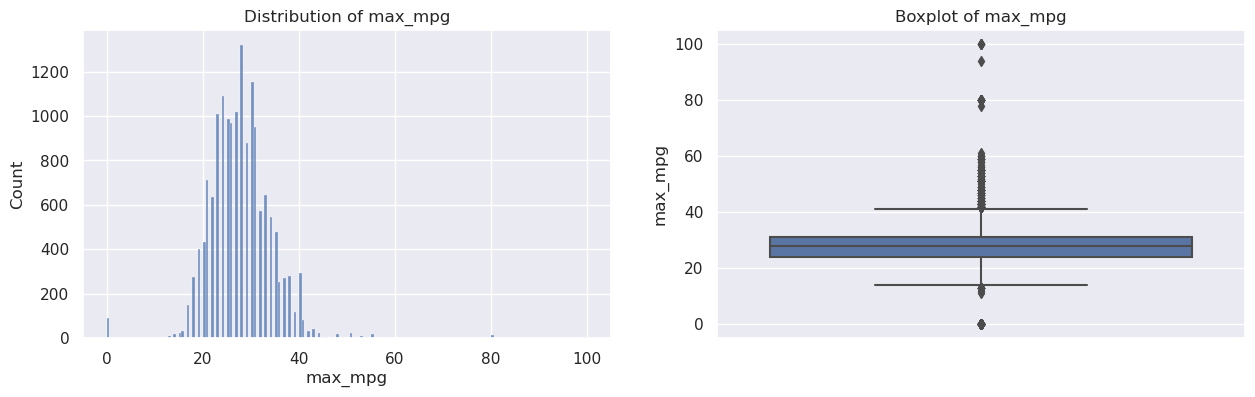

In [21]:
for i, col in enumerate(num_vars):
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    sns.histplot(x=col, data=train, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    
    sns.boxplot(y=col, data=train, ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")

# plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

We can see there are outliers in numerical columns. So, let's replace with **median value**. And also **engine size** is extremely right-skewed. So, let's remove some outlier engine size.

In [22]:
outlier_engine_size = train['engine_size'].quantile(0.999)
train = train[train['engine_size'] < outlier_engine_size]

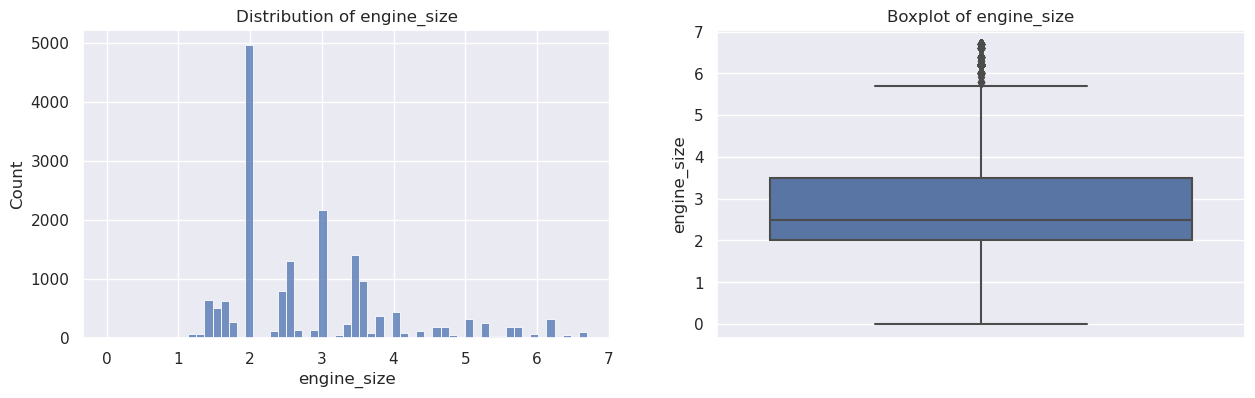

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.histplot(x="engine_size", data=train, ax=axes[0])
axes[0].set_title(f"Distribution of engine_size")

sns.boxplot(y="engine_size", data=train, ax=axes[1])
axes[1].set_title(f"Boxplot of engine_size")

plt.show()

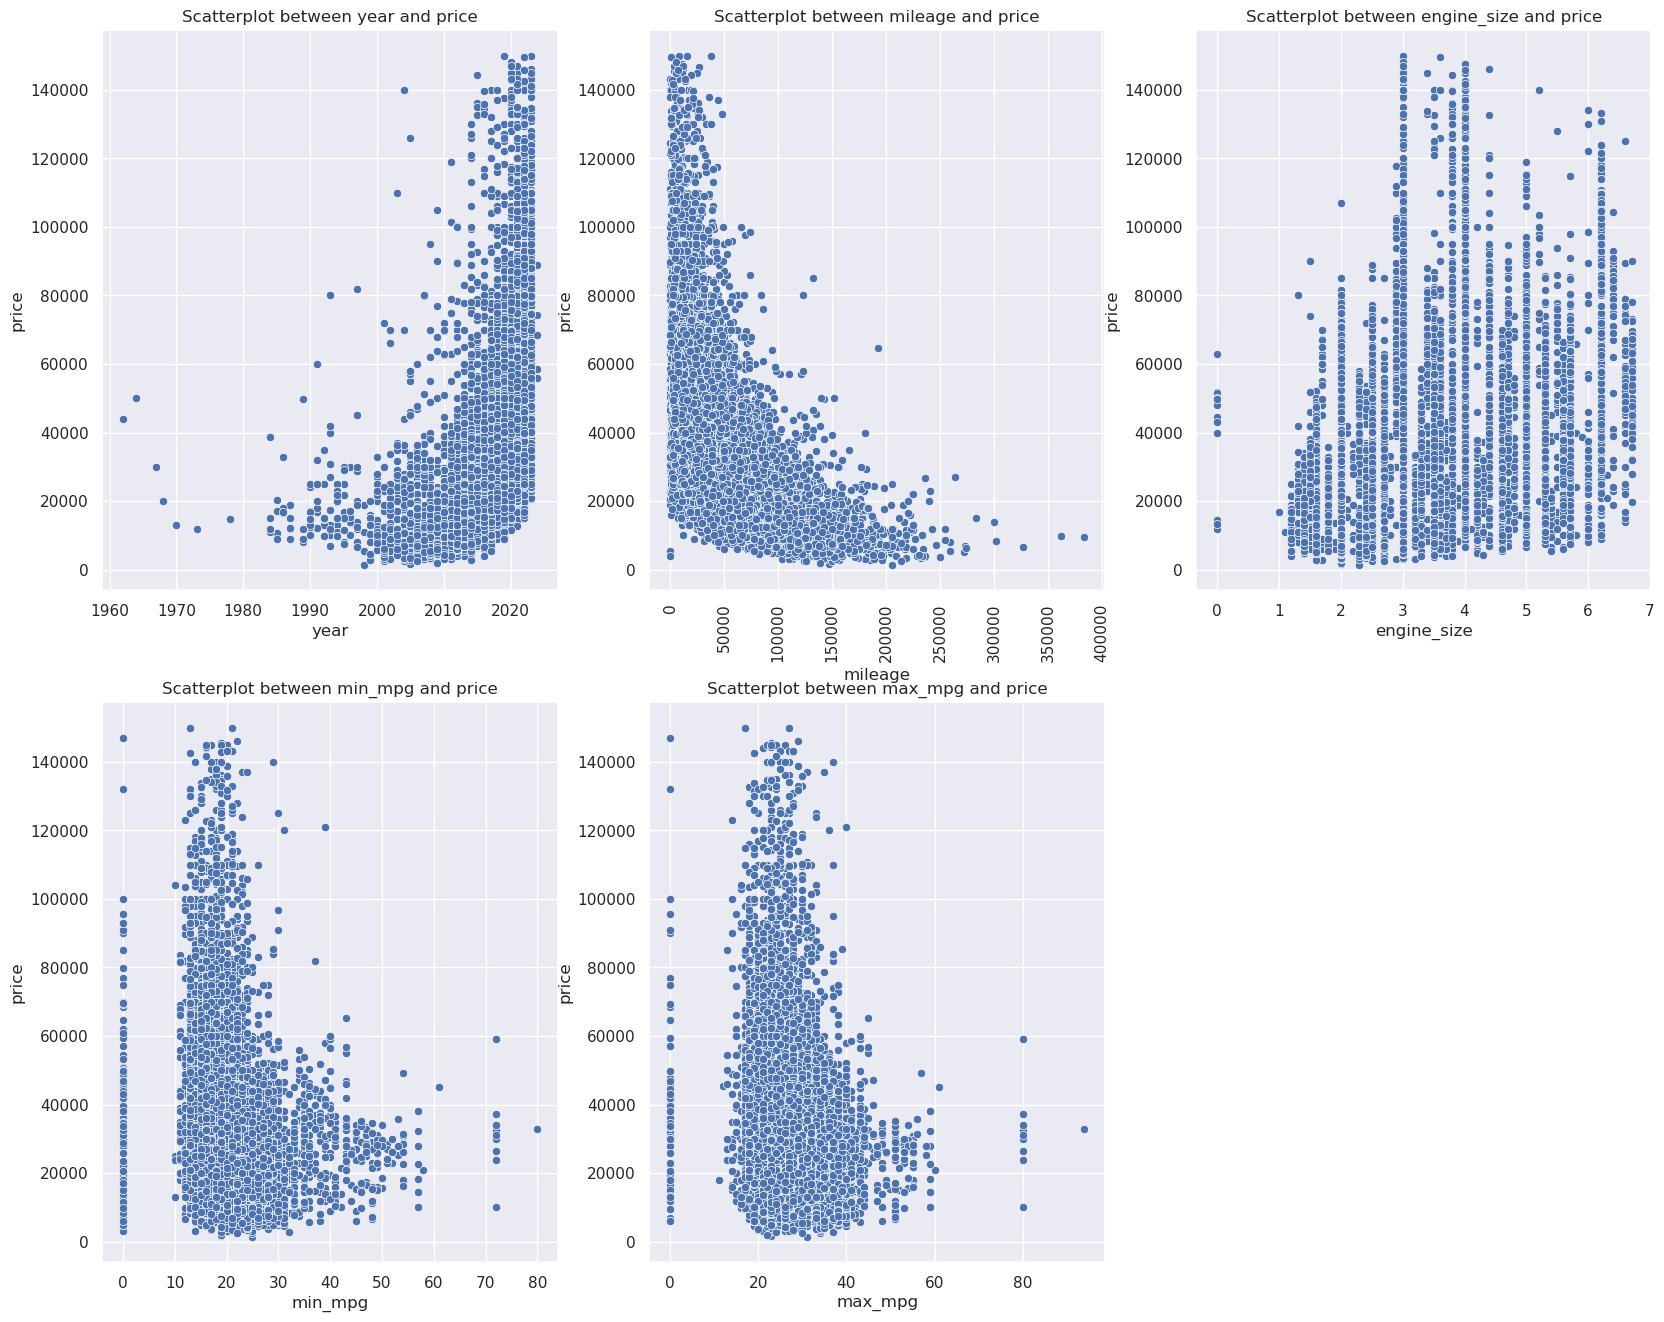

In [24]:
fig = plt.figure(figsize=(20, 16))

for i, col in enumerate(num_vars):
    
    fig.add_subplot(2, 3, i+1)
    sns.scatterplot(data=train, x=col, y=target_var)
    if col == "mileage":
        plt.xticks(rotation=90)
    plt.title(f"Scatterplot between {col} and {target_var}")

In [25]:
from scipy.stats import pearsonr

for i, col in enumerate(num_vars):
    try:
        coef_corr, p_value = pearsonr(train[col], train[target_var])
        print(f"The pearson correlation coefficient between {col} and {target_var} is {coef_corr:.3f} and p_value is {p_value:3f}")
    except:
        pass

The pearson correlation coefficient between year and price is 0.456 and p_value is 0.000000
The pearson correlation coefficient between mileage and price is -0.553 and p_value is 0.000000
The pearson correlation coefficient between engine_size and price is 0.373 and p_value is 0.000000


Only, price and mileage has moderate linear relationship with the target variable.

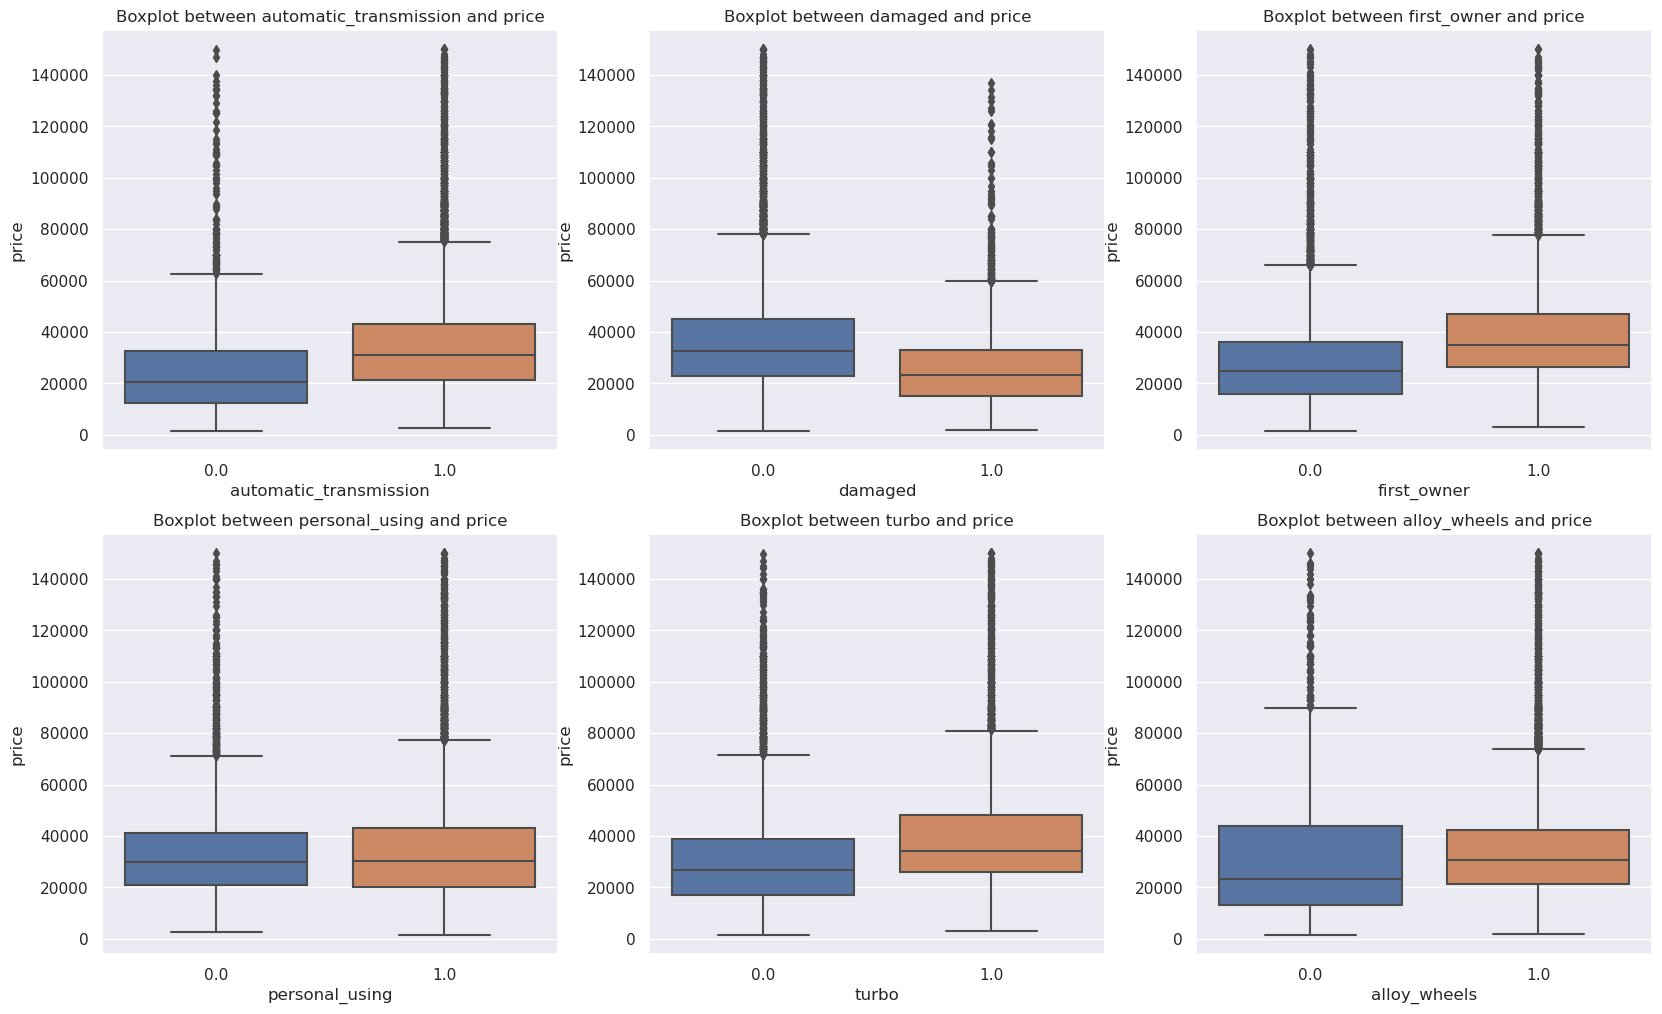

In [26]:
fig = plt.figure(figsize=(20, 12))

for i, col in enumerate(binary_vars[:6]):
    
    fig.add_subplot(2, 3, i+1)
    sns.boxplot(x=col, y=target_var, data=train)
    plt.title(f"Boxplot between {col} and {target_var}")

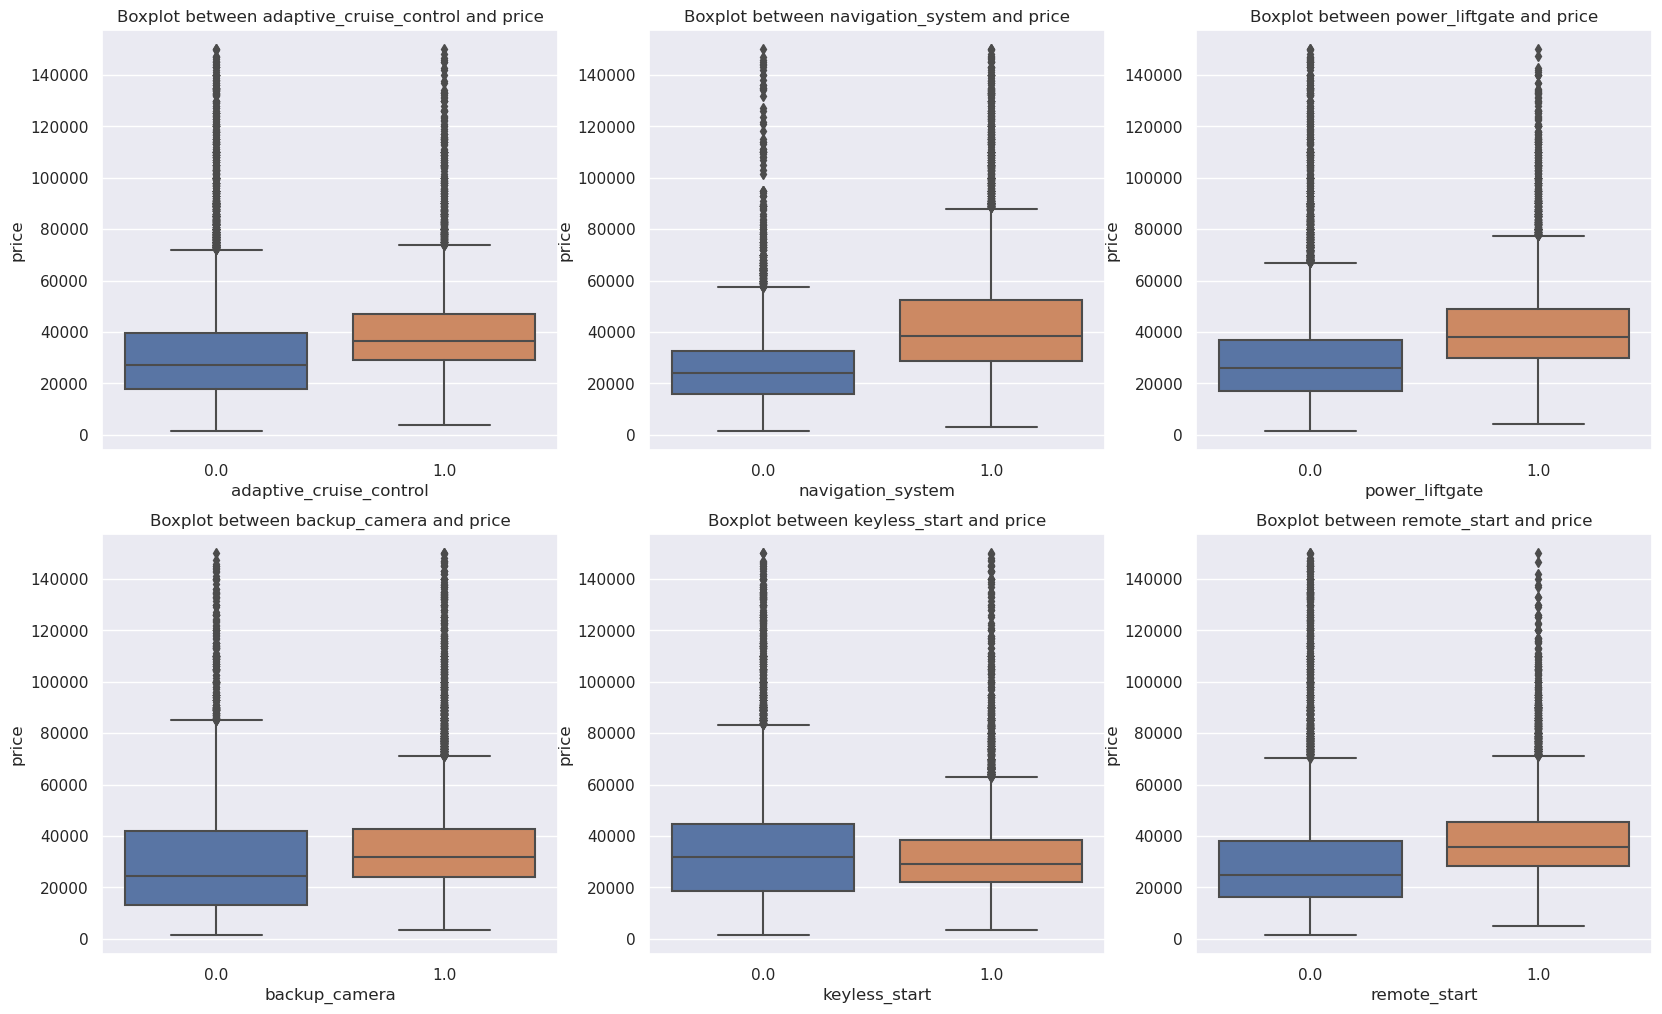

In [27]:
fig = plt.figure(figsize=(20, 12))

for i, col in enumerate(binary_vars[6:12]):
    
    fig.add_subplot(2, 3, i+1)
    sns.boxplot(x=col, y=target_var, data=train)
    plt.title(f"Boxplot between {col} and {target_var}")

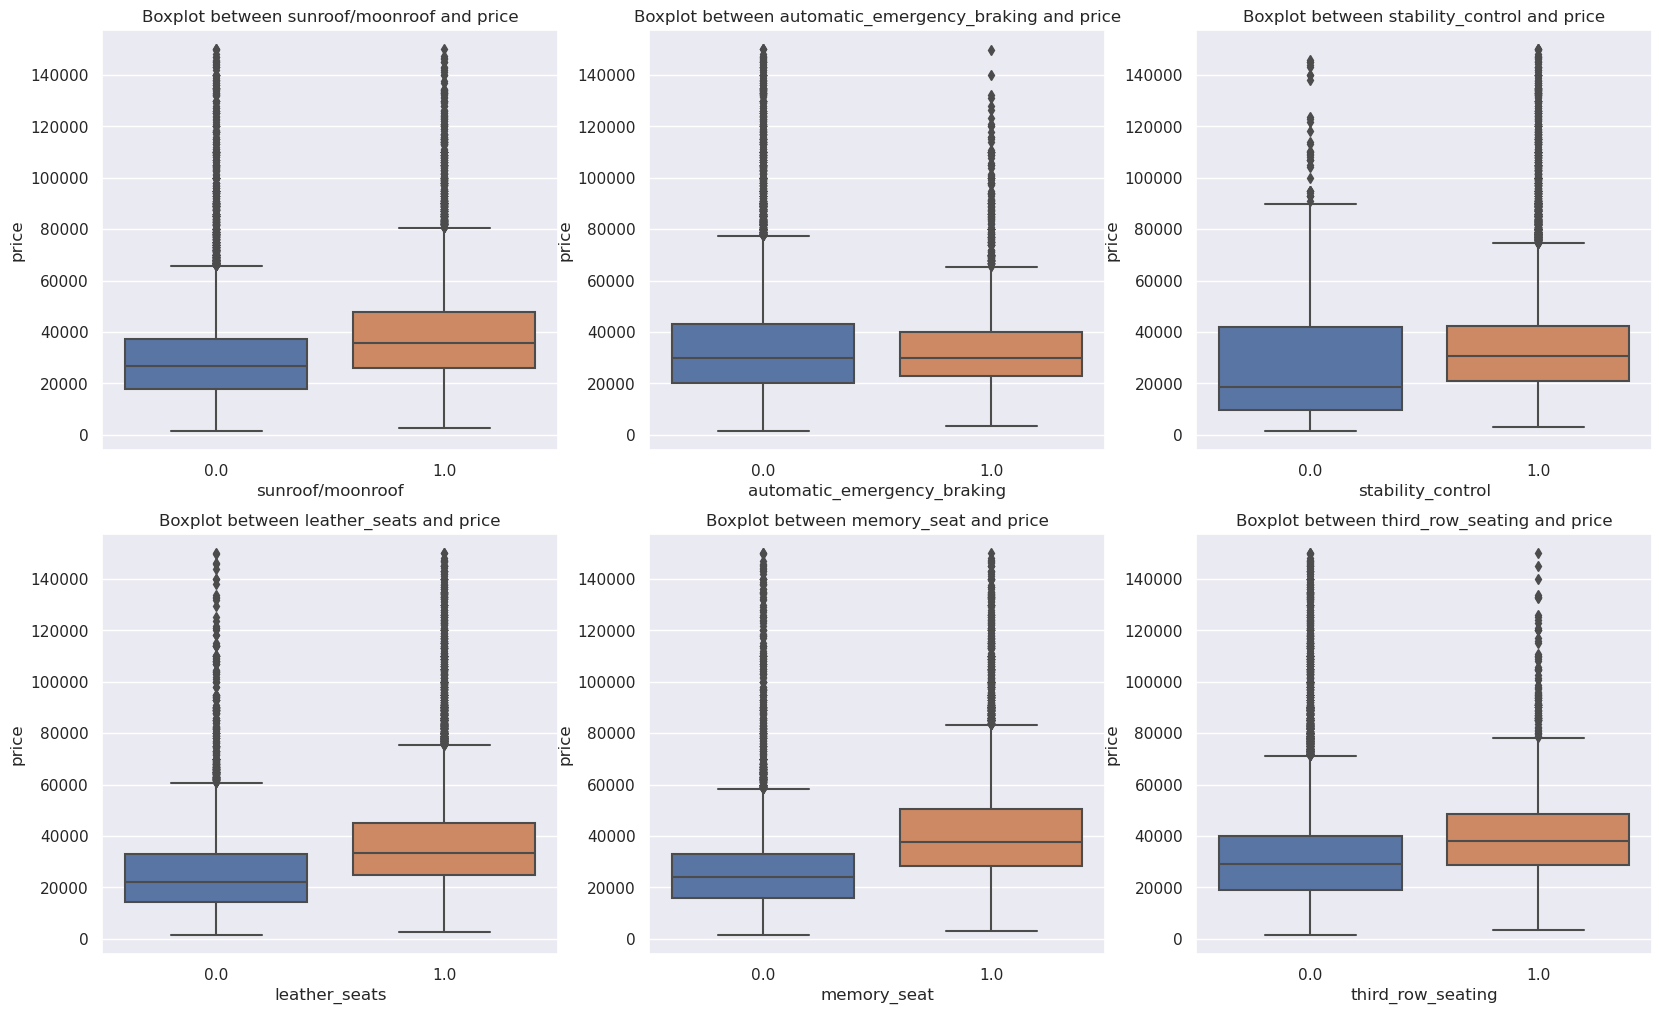

In [28]:
fig = plt.figure(figsize=(20, 12))

for i, col in enumerate(binary_vars[12:18]):
    
    fig.add_subplot(2, 3, i+1)
    sns.boxplot(x=col, y=target_var, data=train)
    plt.title(f"Boxplot between {col} and {target_var}")

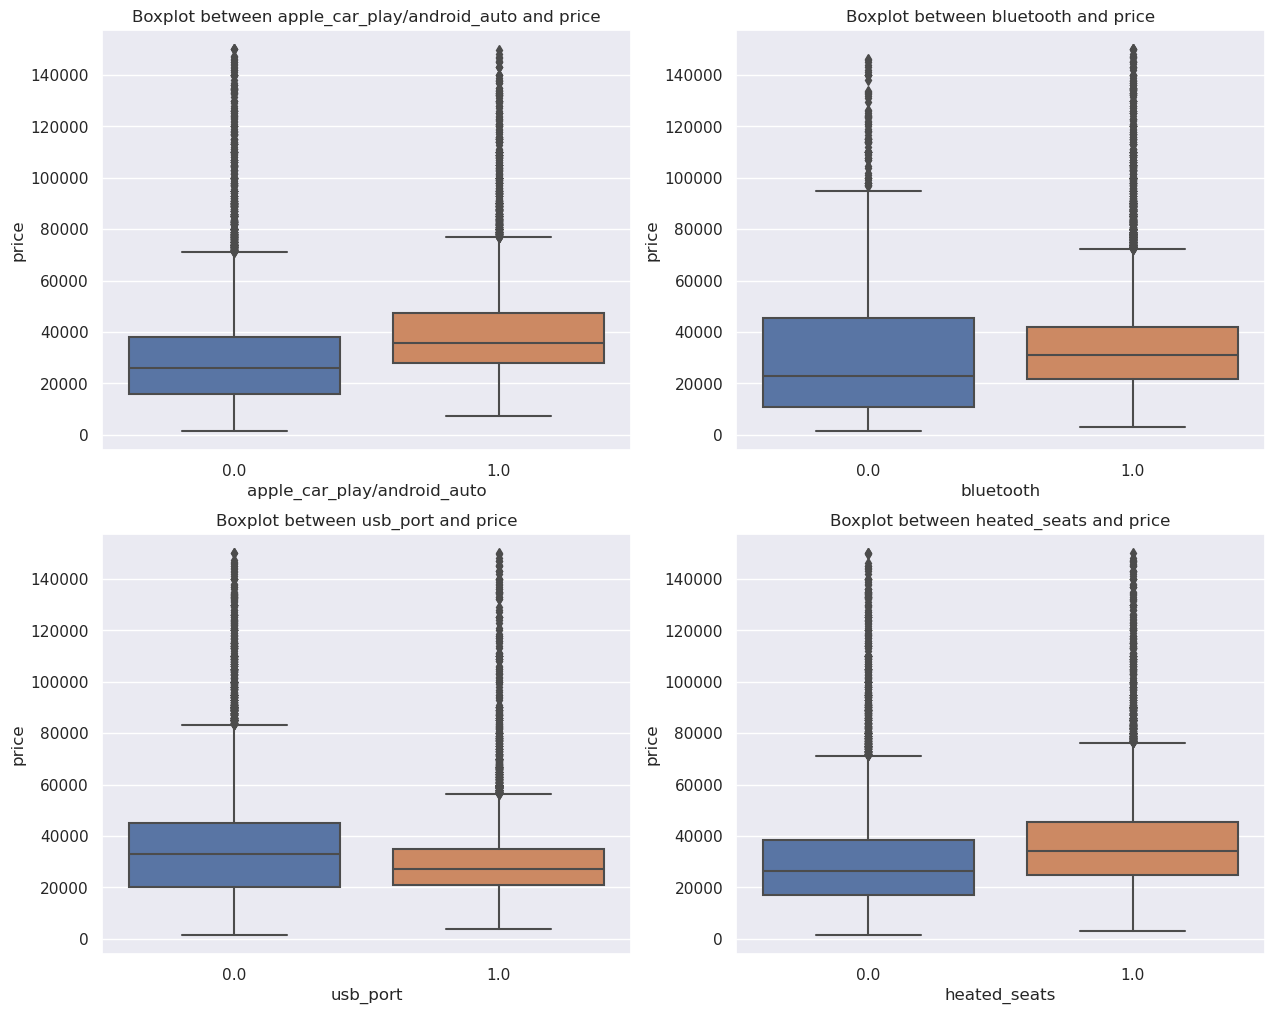

In [29]:
fig = plt.figure(figsize=(15, 12))

for i, col in enumerate(binary_vars[18:]):
    
    fig.add_subplot(2, 2, i+1)
    sns.boxplot(x=col, y=target_var, data=train)
    plt.title(f"Boxplot between {col} and {target_var}")

## Cardinality 

In [30]:
train[cat_vars].nunique()

brand               25
model             3222
engine            1039
transmission       170
fuel_type            9
drivetrain           5
interior_color     877
exterior_color    1826
dtype: int64

In [31]:
use_cat_vars = ["brand", "fuel_type", "drivetrain"]

In [32]:
del_cat_vars = list(set(cat_vars) - set(use_cat_vars))
print(del_cat_vars)

['engine', 'exterior_color', 'model', 'interior_color', 'transmission']


In [33]:
train.drop(del_cat_vars, axis=1, inplace=True)

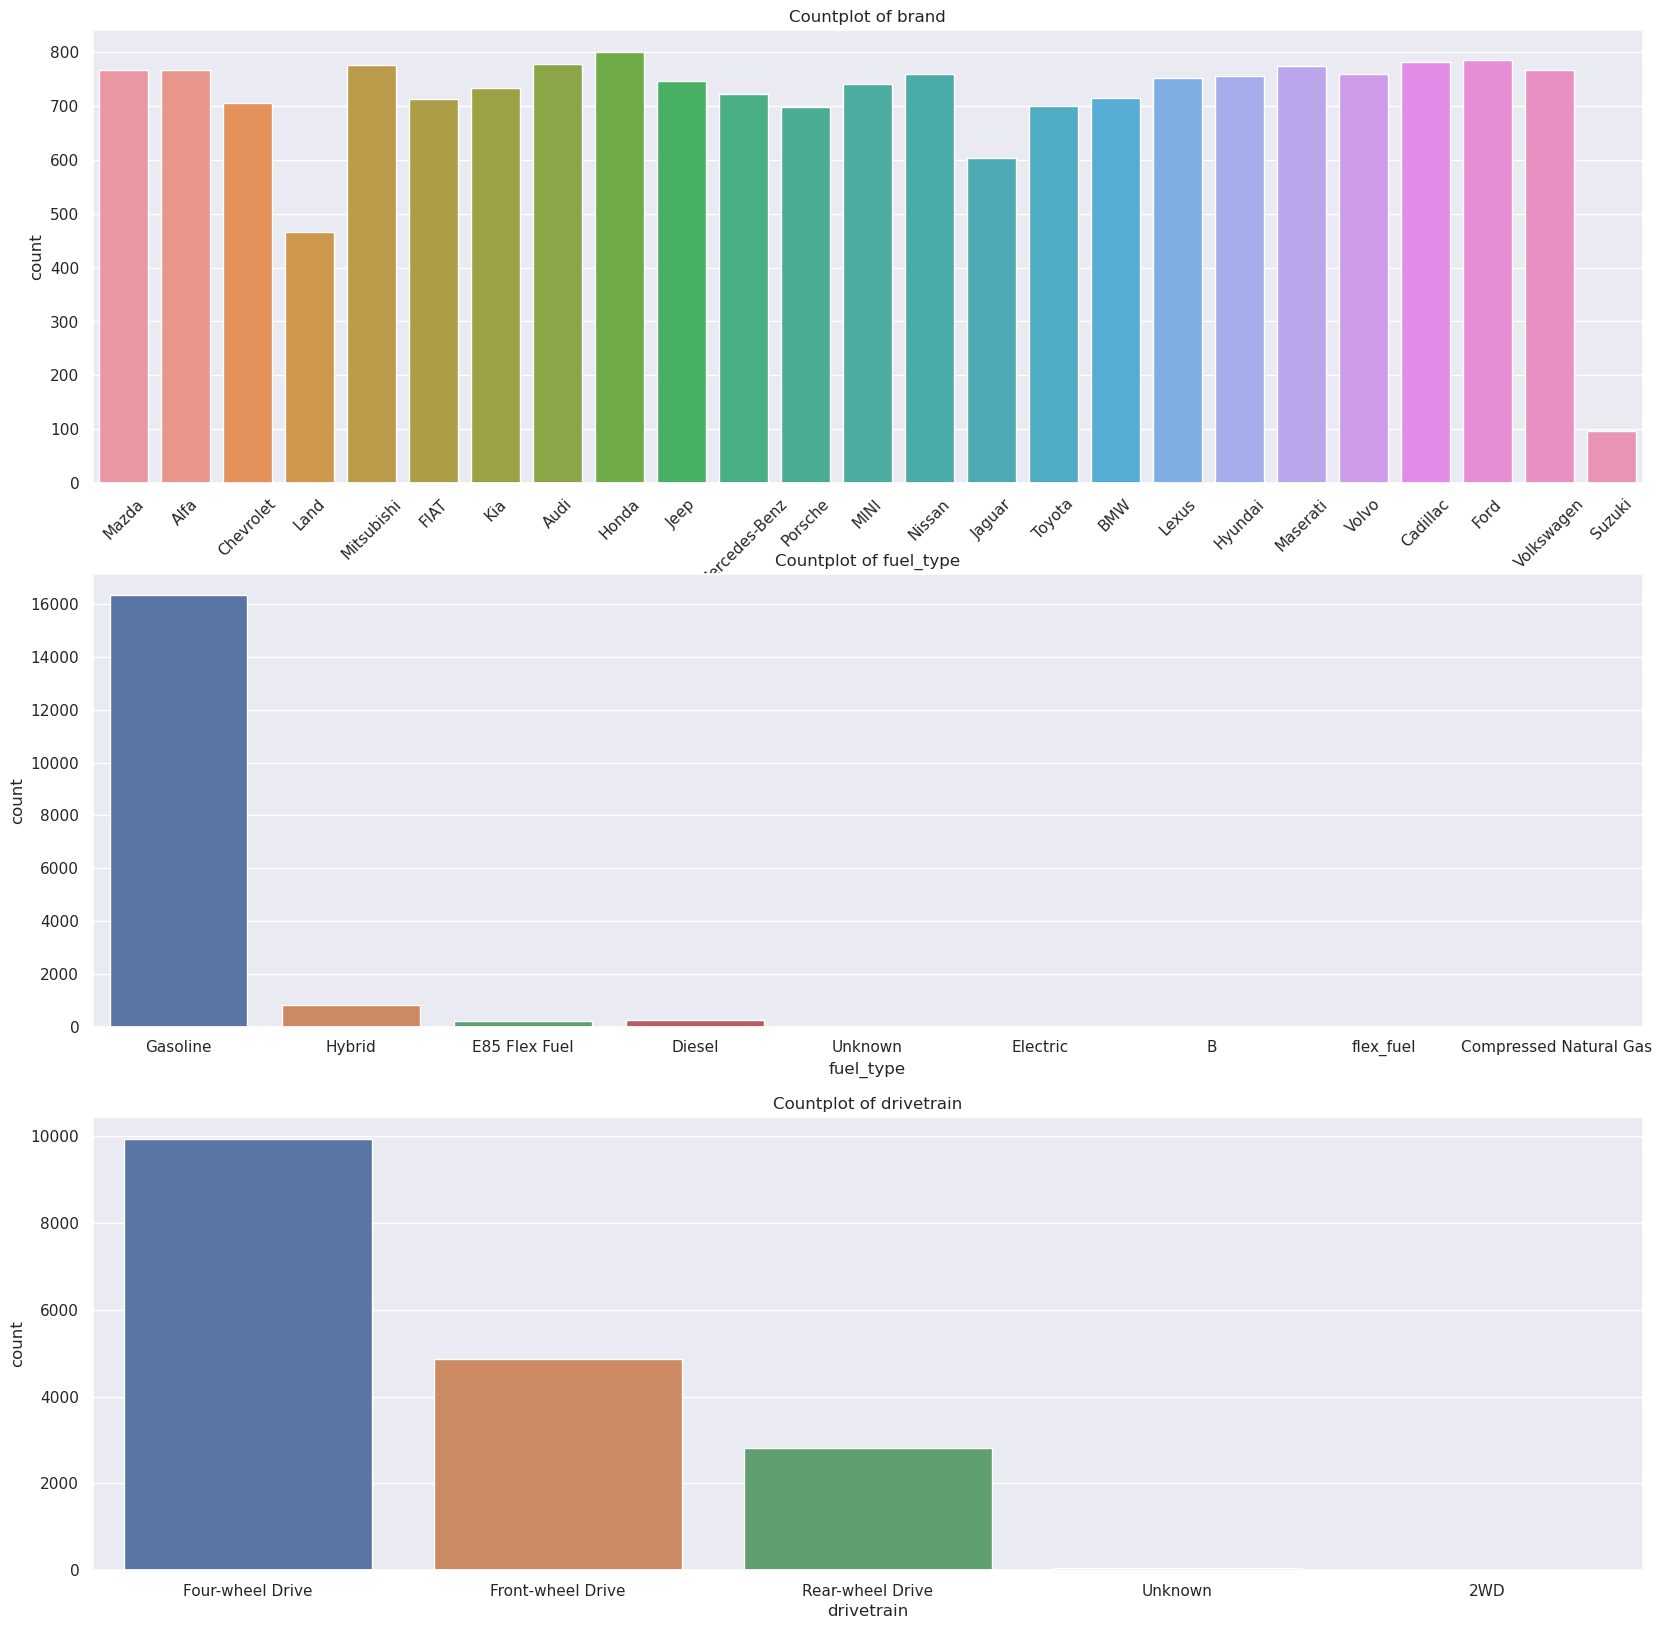

In [34]:
fig = plt.figure(figsize=(20, 20))

for i, col in enumerate(use_cat_vars):
    
    fig.add_subplot(3, 1, i+1)
    sns.countplot(x=col, data=train)
    if col == "brand":
        plt.xticks(rotation=45)
    plt.title(f"Countplot of {col}")

## Data Preprocessing

In [35]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.6/326.6 kB 6.1 MB/s eta 0:00:00


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
train, valid = train_test_split(train, test_size=0.15, random_state=0)

In [38]:
X_train = train.drop(target_var, axis=1)
y_train = train[target_var]

In [39]:
X_valid = valid.drop(target_var, axis=1)
y_valid = valid[target_var]

In [40]:
len(X_train), len(X_valid)

(15003, 2648)

In [41]:
train[binary_vars].dtypes

automatic_transmission         float64
damaged                        float64
first_owner                    float64
personal_using                 float64
turbo                          float64
alloy_wheels                   float64
adaptive_cruise_control        float64
navigation_system              float64
power_liftgate                 float64
backup_camera                  float64
keyless_start                  float64
remote_start                   float64
sunroof/moonroof               float64
automatic_emergency_braking    float64
stability_control              float64
leather_seats                  float64
memory_seat                    float64
third_row_seating              float64
apple_car_play/android_auto    float64
bluetooth                      float64
usb_port                       float64
heated_seats                   float64
dtype: object

- Imputation
    - numerical --> median
    - binary+cat --> frequent
    - target_var --> drop missing data
    
- Encoding
    - cat_var --> RareLabelEncoder()
    - cat_var --> OneHotEncoder()

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from feature_engine.imputation import MeanMedianImputer, CategoricalImputer
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder

In [43]:
preprocessor_pipe = Pipeline([
    ("num_var_imputer", MeanMedianImputer(imputation_method="median", variables=num_vars+binary_vars)),
    ("cat_var_imputer", CategoricalImputer(imputation_method="frequent", variables=use_cat_vars)),
    ("rare_label_encoder", RareLabelEncoder(
    tol=0.03, n_categories=2, variables=use_cat_vars)),
    ("one_hot_encoder", OneHotEncoder(
    variables=use_cat_vars, ignore_format=True)),
    ("scaling", StandardScaler()),
])

### Random Forest Regressor

In [44]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X_train_transformed = preprocessor_pipe.fit_transform(X_train)
X_valid_transformed = preprocessor_pipe.transform(X_valid)

In [46]:
def objective(trial):

    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500, 10),
        'max_depth': trial.suggest_int('max_depth', 1, 20, 1),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10, 1),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5, 1),
        'random_state': 42,
    }


    rf = RandomForestRegressor(**params)
    rf.fit(X_train_transformed, y_train)

    y_pred = rf.predict(X_valid_transformed)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)

    return rmse

In [47]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)
print(study.best_trial)

[I 2023-06-26 14:34:31,207] A new study created in memory with name: no-name-cb0d36f3-ae36-4778-baea-0402167e4385
[I 2023-06-26 14:34:48,522] Trial 0 finished with value: 7590.877336881569 and parameters: {'n_estimators': 270, 'max_depth': 11, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 0 with value: 7590.877336881569.
[I 2023-06-26 14:34:58,805] Trial 1 finished with value: 9819.573438867017 and parameters: {'n_estimators': 270, 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 5}. Best is trial 0 with value: 7590.877336881569.
[I 2023-06-26 14:35:11,029] Trial 2 finished with value: 12044.693695521148 and parameters: {'n_estimators': 460, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 7590.877336881569.
[I 2023-06-26 14:35:16,864] Trial 3 finished with value: 12092.718401358637 and parameters: {'n_estimators': 220, 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 2}. Best is trial 0 with value: 7590.8

FrozenTrial(number=8, state=TrialState.COMPLETE, values=[7002.774368203677], datetime_start=datetime.datetime(2023, 6, 26, 14, 35, 49, 732739), datetime_complete=datetime.datetime(2023, 6, 26, 14, 36, 16, 980988), params={'n_estimators': 320, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=500, log=False, low=10, step=10), 'max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'min_samples_split': IntDistribution(high=10, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=5, log=False, low=1, step=1)}, trial_id=8, value=None)


In [48]:
def eval_model(y_valid, y_pred):
    rmse = mean_squared_error(y_valid, y_pred, squared=False)
    print(f"RMSE: {rmse:.3f}")
    r2= r2_score(y_valid, y_pred)
    print(f"r2_score: {r2:.3f}")

In [49]:
rf_best_params = study.best_params
rf_reg = RandomForestRegressor(**rf_best_params, random_state=42)
rf_reg.fit(X_train_transformed, y_train)
y_pred = rf_reg.predict(X_valid_transformed)
eval_model(y_valid, y_pred)

RMSE: 7002.774
r2_score: 0.878


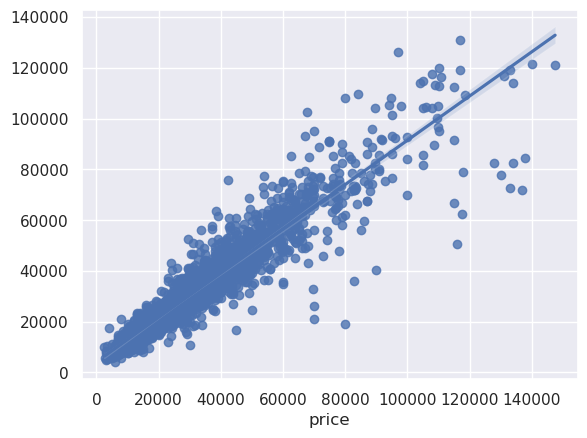

In [50]:
sns.regplot(x=y_valid, y=y_pred)
plt.show()

### XGBoost

In [51]:
import xgboost as xgb
from xgboost import XGBRegressor

In [52]:
dtrain = xgb.DMatrix(X_train_transformed, label=y_train)
dvalid = xgb.DMatrix(X_valid_transformed, label=y_valid)

In [53]:
def objective(trial):
        
    params = {
        "verbosity": 0, 
        "objective": "reg:squarederror",
        "n_estimators": trial.suggest_int('n_estimators', 50, 500, 50),
        "max_depth": trial.suggest_int("max_depth", 3, 100),
        "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.1, log=True),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 0.6, log=True),
        "subsample": trial.suggest_float("subsample", 0.4, 0.8, log=True),
        "alpha": trial.suggest_float("alpha", 0.01, 10.0, log=True),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "gamma": trial.suggest_float("gamma", 1e-8, 10.0, log=True),
        "min_child_weight": trial.suggest_float("min_child_weight", 10, 1000, log=True),
        "seed": 42
    }


    booster = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=25
    )

    y_pred = booster.predict(dvalid)
    rmse = mean_squared_error(y_valid, y_pred, squared=False)

    return rmse

In [54]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

[I 2023-06-26 14:37:04,138] A new study created in memory with name: no-name-308aadbe-21f1-4967-bd47-7921f8c8f917


[0]	validation-rmse:37548.98403
[1]	validation-rmse:35908.70516
[2]	validation-rmse:34261.05711
[3]	validation-rmse:32819.94783
[4]	validation-rmse:31421.81446
[5]	validation-rmse:30152.11323
[6]	validation-rmse:28757.13934
[7]	validation-rmse:27518.35441
[8]	validation-rmse:26425.94243
[9]	validation-rmse:25399.12126
[10]	validation-rmse:24361.88376
[11]	validation-rmse:23510.00536
[12]	validation-rmse:22608.28012
[13]	validation-rmse:21760.37350
[14]	validation-rmse:20907.08834
[15]	validation-rmse:20108.26447
[16]	validation-rmse:19487.38910
[17]	validation-rmse:18666.01644
[18]	validation-rmse:18072.19019
[19]	validation-rmse:17436.43092
[20]	validation-rmse:16843.57150
[21]	validation-rmse:16302.16760
[22]	validation-rmse:15718.45804
[23]	validation-rmse:15259.78372
[24]	validation-rmse:14714.37815
[25]	validation-rmse:14195.79601
[26]	validation-rmse:13842.46379
[27]	validation-rmse:13398.72595
[28]	validation-rmse:12989.77504
[29]	validation-rmse:12593.95786
[30]	validation-rmse

[I 2023-06-26 14:37:32,023] Trial 0 finished with value: 6175.847505166849 and parameters: {'n_estimators': 450, 'max_depth': 28, 'learning_rate': 0.052328464592631456, 'colsample_bytree': 0.42316725416529377, 'subsample': 0.499400578777762, 'alpha': 0.30809787920966275, 'lambda': 0.00039349702212076125, 'gamma': 9.020422395691436e-06, 'min_child_weight': 36.53576766440246}. Best is trial 0 with value: 6175.847505166849.


[0]	validation-rmse:39141.57108
[1]	validation-rmse:38957.20877
[2]	validation-rmse:38768.01538
[3]	validation-rmse:38575.00457
[4]	validation-rmse:38392.08586
[5]	validation-rmse:38211.93093
[6]	validation-rmse:38017.65247
[7]	validation-rmse:37830.79739
[8]	validation-rmse:37643.34235
[9]	validation-rmse:37466.94316
[10]	validation-rmse:37276.30956
[11]	validation-rmse:37092.92622
[12]	validation-rmse:36912.57834
[13]	validation-rmse:36725.77696
[14]	validation-rmse:36544.65620
[15]	validation-rmse:36369.31232
[16]	validation-rmse:36192.34105
[17]	validation-rmse:36009.24156
[18]	validation-rmse:35834.23412
[19]	validation-rmse:35650.45471
[20]	validation-rmse:35476.55300
[21]	validation-rmse:35305.25438
[22]	validation-rmse:35126.64053
[23]	validation-rmse:34958.01597
[24]	validation-rmse:34780.98622
[25]	validation-rmse:34605.30708
[26]	validation-rmse:34434.65187
[27]	validation-rmse:34260.67420
[28]	validation-rmse:34088.77303
[29]	validation-rmse:33920.47192
[30]	validation-rmse

[I 2023-06-26 14:38:07,541] Trial 1 finished with value: 7696.226447979593 and parameters: {'n_estimators': 50, 'max_depth': 56, 'learning_rate': 0.005580525971739, 'colsample_bytree': 0.5944957078553865, 'subsample': 0.543922622862225, 'alpha': 0.18818595682308184, 'lambda': 0.29278254392346525, 'gamma': 1.1148722443144803e-07, 'min_child_weight': 124.03023087512146}. Best is trial 0 with value: 6175.847505166849.


[0]	validation-rmse:37364.33671
[1]	validation-rmse:35504.74950
[2]	validation-rmse:33633.06207
[3]	validation-rmse:32045.66768
[4]	validation-rmse:30556.59633
[5]	validation-rmse:29202.29262
[6]	validation-rmse:27863.81196
[7]	validation-rmse:26507.66432
[8]	validation-rmse:25424.38598
[9]	validation-rmse:24350.07447
[10]	validation-rmse:23409.67081
[11]	validation-rmse:22559.60963
[12]	validation-rmse:21575.93340
[13]	validation-rmse:20893.05958
[14]	validation-rmse:20053.72827
[15]	validation-rmse:19224.92424
[16]	validation-rmse:18666.15172
[17]	validation-rmse:17989.48668
[18]	validation-rmse:17430.70298
[19]	validation-rmse:16972.04020
[20]	validation-rmse:16499.49679
[21]	validation-rmse:15965.16982
[22]	validation-rmse:15611.64171
[23]	validation-rmse:15318.82325
[24]	validation-rmse:14907.73286
[25]	validation-rmse:14324.44017
[26]	validation-rmse:13996.44589
[27]	validation-rmse:13642.67001
[28]	validation-rmse:13328.55846
[29]	validation-rmse:12994.34934
[30]	validation-rmse

[I 2023-06-26 14:38:21,519] Trial 2 finished with value: 6019.037638487029 and parameters: {'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.062084422461183134, 'colsample_bytree': 0.24475060512500588, 'subsample': 0.7090352590012418, 'alpha': 5.786807823864334, 'lambda': 7.282482274571878e-06, 'gamma': 9.973667799462913e-06, 'min_child_weight': 28.466211755539135}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:38668.84633
[1]	validation-rmse:38046.56686
[2]	validation-rmse:37413.63879
[3]	validation-rmse:36780.79426
[4]	validation-rmse:36193.74053
[5]	validation-rmse:35628.75852
[6]	validation-rmse:35018.93652
[7]	validation-rmse:34443.60417
[8]	validation-rmse:33873.40131
[9]	validation-rmse:33348.69067
[10]	validation-rmse:32806.22340
[11]	validation-rmse:32278.00936
[12]	validation-rmse:31757.83068
[13]	validation-rmse:31224.87616
[14]	validation-rmse:30717.02851
[15]	validation-rmse:30231.15467
[16]	validation-rmse:29756.08725
[17]	validation-rmse:29255.52122
[18]	validation-rmse:28793.57292
[19]	validation-rmse:28334.11659
[20]	validation-rmse:27890.03447
[21]	validation-rmse:27459.82398
[22]	validation-rmse:27004.87166
[23]	validation-rmse:26602.71714
[24]	validation-rmse:26170.23541
[25]	validation-rmse:25741.27710
[26]	validation-rmse:25342.53088
[27]	validation-rmse:24937.63311
[28]	validation-rmse:24537.08232
[29]	validation-rmse:24152.21440
[30]	validation-rmse

[I 2023-06-26 14:39:04,553] Trial 3 finished with value: 6524.576405366349 and parameters: {'n_estimators': 200, 'max_depth': 83, 'learning_rate': 0.0189923808108155, 'colsample_bytree': 0.53439359363305, 'subsample': 0.7610244140430636, 'alpha': 0.5269395139411662, 'lambda': 2.633875800396422e-07, 'gamma': 1.9545410425595922e-08, 'min_child_weight': 131.52199349467705}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:36613.38338
[1]	validation-rmse:34174.51365
[2]	validation-rmse:31751.65654
[3]	validation-rmse:29770.08121
[4]	validation-rmse:27975.88791
[5]	validation-rmse:26386.42340
[6]	validation-rmse:24794.19911
[7]	validation-rmse:23249.44814
[8]	validation-rmse:22068.97654
[9]	validation-rmse:20922.12828
[10]	validation-rmse:19712.23222
[11]	validation-rmse:18838.90861
[12]	validation-rmse:17865.26165
[13]	validation-rmse:17214.86112
[14]	validation-rmse:16417.37750
[15]	validation-rmse:15592.54761
[16]	validation-rmse:15095.57756
[17]	validation-rmse:14508.80712
[18]	validation-rmse:14009.56241
[19]	validation-rmse:13672.63586
[20]	validation-rmse:13125.72372
[21]	validation-rmse:12700.98295
[22]	validation-rmse:12455.92241
[23]	validation-rmse:12265.19377
[24]	validation-rmse:11722.62816
[25]	validation-rmse:11212.52460
[26]	validation-rmse:10989.37764
[27]	validation-rmse:10752.21557
[28]	validation-rmse:10543.45766
[29]	validation-rmse:10285.81013
[30]	validation-rmse

[I 2023-06-26 14:39:26,090] Trial 4 finished with value: 6280.660372632682 and parameters: {'n_estimators': 100, 'max_depth': 58, 'learning_rate': 0.08272768721078143, 'colsample_bytree': 0.28751615372288164, 'subsample': 0.7604686063486186, 'alpha': 0.6792425082346092, 'lambda': 2.7276099339134804e-06, 'gamma': 1.1218621289944541, 'min_child_weight': 19.230616921162234}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:38499.54208
[1]	validation-rmse:37688.28125
[2]	validation-rmse:36860.69345
[3]	validation-rmse:36102.34134
[4]	validation-rmse:35345.38078
[5]	validation-rmse:34618.75523
[6]	validation-rmse:33904.87719
[7]	validation-rmse:33159.75809
[8]	validation-rmse:32517.36673
[9]	validation-rmse:31859.06834
[10]	validation-rmse:31234.78198
[11]	validation-rmse:30660.75268
[12]	validation-rmse:30021.98885
[13]	validation-rmse:29481.52928
[14]	validation-rmse:28883.11466
[15]	validation-rmse:28299.54742
[16]	validation-rmse:27802.80043
[17]	validation-rmse:27256.47183
[18]	validation-rmse:26771.60213
[19]	validation-rmse:26294.40089
[20]	validation-rmse:25839.19966
[21]	validation-rmse:25340.43920
[22]	validation-rmse:24923.11739
[23]	validation-rmse:24530.96706
[24]	validation-rmse:24089.69235
[25]	validation-rmse:23588.10696
[26]	validation-rmse:23187.76862
[27]	validation-rmse:22769.34828
[28]	validation-rmse:22366.97811
[29]	validation-rmse:21970.00460
[30]	validation-rmse

[I 2023-06-26 14:39:44,455] Trial 5 finished with value: 7828.538210254462 and parameters: {'n_estimators': 350, 'max_depth': 51, 'learning_rate': 0.026637411896419338, 'colsample_bytree': 0.2565215136266149, 'subsample': 0.4290448787543801, 'alpha': 0.013590084899253773, 'lambda': 0.02946216935059636, 'gamma': 6.234091840888683e-07, 'min_child_weight': 206.24747389468482}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:36853.62712
[1]	validation-rmse:34608.29496
[2]	validation-rmse:32396.12875
[3]	validation-rmse:30560.34881
[4]	validation-rmse:28866.90241
[5]	validation-rmse:27358.80302
[6]	validation-rmse:25907.17732
[7]	validation-rmse:24426.17265
[8]	validation-rmse:23282.51406
[9]	validation-rmse:22175.79360
[10]	validation-rmse:20995.28242
[11]	validation-rmse:20138.10340
[12]	validation-rmse:19195.11863
[13]	validation-rmse:18553.24977
[14]	validation-rmse:17760.42466
[15]	validation-rmse:16990.43621
[16]	validation-rmse:16507.27167
[17]	validation-rmse:15940.33072
[18]	validation-rmse:15437.92646
[19]	validation-rmse:15060.70112
[20]	validation-rmse:14528.45926
[21]	validation-rmse:14093.70791
[22]	validation-rmse:13829.78975
[23]	validation-rmse:13616.76554
[24]	validation-rmse:13099.53628
[25]	validation-rmse:12595.09947
[26]	validation-rmse:12362.19978
[27]	validation-rmse:12109.81463
[28]	validation-rmse:11863.16454
[29]	validation-rmse:11593.52813
[30]	validation-rmse

[I 2023-06-26 14:40:14,478] Trial 6 finished with value: 6184.533444085253 and parameters: {'n_estimators': 250, 'max_depth': 23, 'learning_rate': 0.07730060766400047, 'colsample_bytree': 0.282746365339326, 'subsample': 0.7205146135093426, 'alpha': 0.03879807860859244, 'lambda': 1.162959156375084, 'gamma': 2.9076072027664095, 'min_child_weight': 92.04888174287807}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:39127.37714
[1]	validation-rmse:38921.66371
[2]	validation-rmse:38700.82522
[3]	validation-rmse:38498.74484
[4]	validation-rmse:38295.68781
[5]	validation-rmse:38097.15678
[6]	validation-rmse:37874.63789
[7]	validation-rmse:37663.61857
[8]	validation-rmse:37470.04164
[9]	validation-rmse:37267.19513
[10]	validation-rmse:37059.12347
[11]	validation-rmse:36870.00225
[12]	validation-rmse:36666.71892
[13]	validation-rmse:36480.91832
[14]	validation-rmse:36277.60196
[15]	validation-rmse:36075.30533
[16]	validation-rmse:35885.41328
[17]	validation-rmse:35683.99393
[18]	validation-rmse:35491.54144
[19]	validation-rmse:35304.11122
[20]	validation-rmse:35105.77222
[21]	validation-rmse:34911.04501
[22]	validation-rmse:34723.70132
[23]	validation-rmse:34551.79823
[24]	validation-rmse:34348.79275
[25]	validation-rmse:34148.18150
[26]	validation-rmse:33964.95742
[27]	validation-rmse:33769.28483
[28]	validation-rmse:33581.18351
[29]	validation-rmse:33398.69684
[30]	validation-rmse

[I 2023-06-26 14:40:54,949] Trial 7 finished with value: 6843.087670441425 and parameters: {'n_estimators': 350, 'max_depth': 45, 'learning_rate': 0.006335919905234209, 'colsample_bytree': 0.31528856365223995, 'subsample': 0.589108924165237, 'alpha': 0.2977392561948392, 'lambda': 4.049467598968783e-06, 'gamma': 0.01198649570128596, 'min_child_weight': 19.741753900098416}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:39025.57533
[1]	validation-rmse:38715.31679
[2]	validation-rmse:38382.67893
[3]	validation-rmse:38078.49045
[4]	validation-rmse:37773.07740
[5]	validation-rmse:37476.00185
[6]	validation-rmse:37166.61134
[7]	validation-rmse:36849.30009
[8]	validation-rmse:36570.35294
[9]	validation-rmse:36277.71421
[10]	validation-rmse:36000.20412
[11]	validation-rmse:35726.06732
[12]	validation-rmse:35431.04309
[13]	validation-rmse:35167.60352
[14]	validation-rmse:34879.30697
[15]	validation-rmse:34587.13478
[16]	validation-rmse:34325.53195
[17]	validation-rmse:34045.22853
[18]	validation-rmse:33778.77282
[19]	validation-rmse:33526.32210
[20]	validation-rmse:33262.86264
[21]	validation-rmse:32991.74374
[22]	validation-rmse:32741.10491
[23]	validation-rmse:32500.75089
[24]	validation-rmse:32239.09427
[25]	validation-rmse:31954.79700
[26]	validation-rmse:31702.83006
[27]	validation-rmse:31445.69166
[28]	validation-rmse:31191.87807
[29]	validation-rmse:30957.63488
[30]	validation-rmse

[I 2023-06-26 14:41:24,510] Trial 8 finished with value: 7144.403383397384 and parameters: {'n_estimators': 450, 'max_depth': 85, 'learning_rate': 0.0097938807724516, 'colsample_bytree': 0.22462632870268634, 'subsample': 0.6794983325360403, 'alpha': 0.015931498771734436, 'lambda': 0.0003155507961647584, 'gamma': 3.0741451334773666, 'min_child_weight': 40.297070178234094}. Best is trial 2 with value: 6019.037638487029.


[0]	validation-rmse:38512.38370
[1]	validation-rmse:37717.95270
[2]	validation-rmse:36888.06111
[3]	validation-rmse:36140.82292
[4]	validation-rmse:35402.35664
[5]	validation-rmse:34702.04579
[6]	validation-rmse:33990.20415
[7]	validation-rmse:33259.56732
[8]	validation-rmse:32615.75987
[9]	validation-rmse:31960.60599
[10]	validation-rmse:31279.83320
[11]	validation-rmse:30697.36485
[12]	validation-rmse:30068.42218
[13]	validation-rmse:29525.22001
[14]	validation-rmse:28936.94539
[15]	validation-rmse:28343.18696
[16]	validation-rmse:27833.61114
[17]	validation-rmse:27288.82006
[18]	validation-rmse:26781.93192
[19]	validation-rmse:26304.64181
[20]	validation-rmse:25772.56640
[21]	validation-rmse:25272.23860
[22]	validation-rmse:24844.95912
[23]	validation-rmse:24445.17023
[24]	validation-rmse:23937.24343
[25]	validation-rmse:23432.68759
[26]	validation-rmse:23019.46248
[27]	validation-rmse:22594.75867
[28]	validation-rmse:22179.36664
[29]	validation-rmse:21773.13597
[30]	validation-rmse

[I 2023-06-26 14:41:54,932] Trial 9 finished with value: 6461.663323319583 and parameters: {'n_estimators': 250, 'max_depth': 33, 'learning_rate': 0.025422166901915486, 'colsample_bytree': 0.2840856303970195, 'subsample': 0.48961730715579177, 'alpha': 0.055169859947716046, 'lambda': 1.2569843000989666e-08, 'gamma': 0.3663177861897031, 'min_child_weight': 50.93274205786445}. Best is trial 2 with value: 6019.037638487029.


In [55]:
xgb_best_param = study.best_params
xgb_best_score = study.best_value
print(xgb_best_score)

6019.037638487029


In [56]:
xgb_best_param = dict(**xgb_best_param, seed=42)

In [57]:
booster = xgb.train(
    params=xgb_best_param,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dvalid, 'validation')],
    early_stopping_rounds=25
    )

y_pred = booster.predict(dvalid)
eval_model(y_valid, y_pred)

[0]	validation-rmse:37364.33671
[1]	validation-rmse:35504.74950
[2]	validation-rmse:33633.06207
[3]	validation-rmse:32045.66768
[4]	validation-rmse:30556.59633
[5]	validation-rmse:29202.29262
[6]	validation-rmse:27863.81196
[7]	validation-rmse:26507.66432
[8]	validation-rmse:25424.38598
[9]	validation-rmse:24350.07447
[10]	validation-rmse:23409.67081
[11]	validation-rmse:22559.60963
[12]	validation-rmse:21575.93340
[13]	validation-rmse:20893.05958
[14]	validation-rmse:20053.72827
[15]	validation-rmse:19224.92424
[16]	validation-rmse:18666.15172
[17]	validation-rmse:17989.48668
[18]	validation-rmse:17430.70298
[19]	validation-rmse:16972.04020
[20]	validation-rmse:16499.49679
[21]	validation-rmse:15965.16982
[22]	validation-rmse:15611.64171
[23]	validation-rmse:15318.82325
[24]	validation-rmse:14907.73286
[25]	validation-rmse:14324.44017
[26]	validation-rmse:13996.44589
[27]	validation-rmse:13642.67001
[28]	validation-rmse:13328.55846
[29]	validation-rmse:12994.34934
[30]	validation-rmse

## Testing data evaluation

In [58]:
test = pd.read_csv("/kaggle/input/used-car-listings-features-and-prices-carscom/test.csv")
test.dropna(subset=['price'], inplace=True)
test = test[test['price'].str.isnumeric()]
test['price'] = test['price'].astype(int)
test = test[test['price'] < outlier_price]
test = test[test['engine_size'] < outlier_engine_size]

In [59]:
test.drop(del_cat_vars, axis=1, inplace=True)
X_test = test.drop(target_var, axis=1)
y_test = test[target_var]
print(X_test.shape)
X_test_transformed = preprocessor_pipe.transform(X_test)


(4439, 30)


### XGBoost model on test data

In [60]:
dtest = xgb.DMatrix(X_test_transformed)
y_pred = booster.predict(dtest)
eval_model(y_test, y_pred)

RMSE: 6184.672
r2_score: 0.904


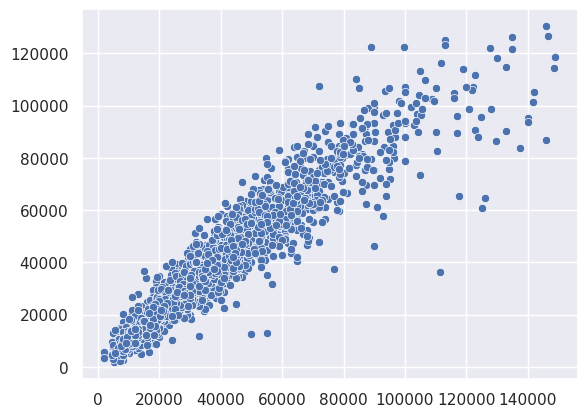

In [61]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()

### Random Forest model on test data

In [62]:
y_pred = rf_reg.predict(X_test_transformed)
eval_model(y_test, y_pred)

RMSE: 6647.595
r2_score: 0.889


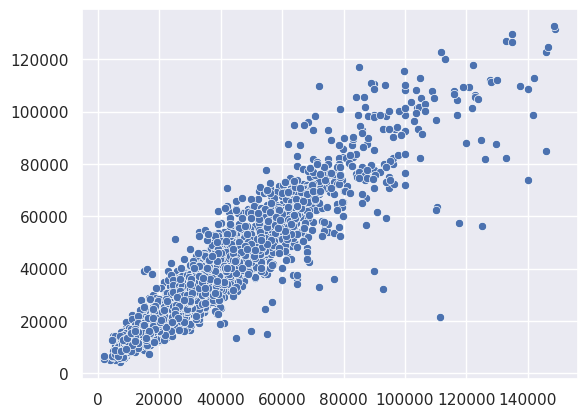

In [63]:
sns.scatterplot(x=y_test.values, y=y_pred)
plt.show()